<a href="https://colab.research.google.com/github/Gustavo-Martinez-Gutierrez/Gustavo_portfolio/blob/main/1_Customer_Analytics_Segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

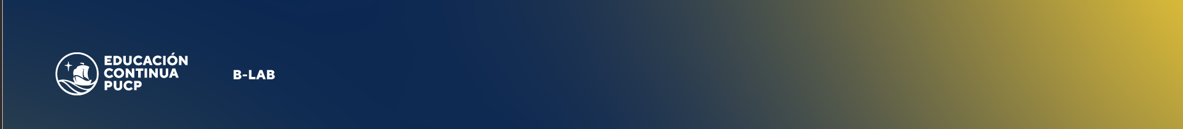

# Segmentación

## Caso de Negocio

En este caso, se busca segmentar una base de datos de clientes en base a sus características demográficas y sus perfiles de compra.

In [ ]:
# Importar librerías

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap  # Permite definir paletas de colores personalizadas a partir de listas.
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

Los atributos son los siguientes, y se dividen en atributos de la persona y de los productos que compra:

**Persona**

* ID: Identificador único del cliente
* Year_Birth: Año de nacimiento del cliente
* Education: Nivel educativo del cliente
* Marital_Status: Estado civil del cliente
* Income: Ingreso anual del cliente
* Kidhome: Número de hijos en el hogar del cliente.
* Teenhome: Número de adolescentes en el hogar del cliente.
* Dt_Customer: Fecha de la primera compra del cliente
* Recency: Número de días desde la última compra del cliente
* Complain: 1 si el cliente tuvo un reclamo en los últimos 2 años, 0 en otro caso

**Productos**

* MntWines: Monto gastado en vino en los últimos 2 años
* MntFruits: Monto gastado en frutas en los últimos 2 años
* MntMeatProducts: Monto gastado en carne en los últimos 2 años
* MntFishProducts: Monto gastado en pescado en los últimos 2 años
* MntSweetProducts: Monto gastado en dulces en los últimos 2 años
* MntGoldProds: Monto gastado en ¿oro? en los últimos 2 años

**Promociones**

* NumDealsPurchases: Número de compras realizadas con un descuento
* AcceptedCmp1: 1 si el consumidor aceptó la oferta en la 1a campaña, 0 en otro caso
* AcceptedCmp2: 1 si el consumidor acetó la oferta en la 2a campaña, 0 en otro caso
* AcceptedCmp3: 1 si el consumidor acetó la oferta en la 3a campaña, 0 en otro caso
* AcceptedCmp4: 1 si el consumidor acetó la oferta en la 4a campaña, 0 en otro caso
* AcceptedCmp5: 1 si el consumidor acetó la oferta en la 5a campaña, 0 en otro caso
* Response: 1 si el consumidor acetó la oferta en la ultima campaña, 0 en otro caso

* NumWebPurchases: Número de compras realizadas en el canal web
* NumCatalogPurchases: Número de compras realizadas por catálogo
* NumStorePurchases: Número de compras realizadas en canal físico
* NumWebVisitsMonth: Número de visitas a la web en el último mes

## 1. Limpieza de los Datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data = data.dropna()
print("El número de observaciones luego de eliminar los missing es:", len(data))

El número de observaciones luego de eliminar los missing es: 2216


En el siguiente paso, vamos a crear una nueva característica a partir de la columna 'Dt_Customer' que indique el número de días que un cliente está registrado en la base de datos de la empresa. Sin embargo, la versión original de Dt_customer está en formato fecha y hora. Primero extraemos el componente de fecha.

Posteriormente, para simplificar, tomaremos este valor relativo al cliente más reciente registrado. Por lo tanto, para obtener los valores, debemos comprobar las fechas más reciente y más antigua registradas.

In [ ]:
print(data["Dt_Customer"])

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]).dt.date

print(max(data["Dt_Customer"]))
print(min(data["Dt_Customer"]))

2014-12-06
2012-01-08


Creamos un atributo ("Customer_For") del número de días en el que el consumidor comenzó a comprar en la tienda, en relación a la última fecha almacenada

In [ ]:
d1 = max(data['Dt_Customer']) # el cliente más nuevo
delta = d1 - data['Dt_Customer']

print(delta)

data["Customer_For"] = delta
data["Customer_For"] = (data["Customer_For"].dt.total_seconds())/86400  # Número de segundos en 1 día

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: Dt_Customer, Length: 2216, dtype: timedelta64[ns]


In [ ]:
print(data["Customer_For"])

0       971.0
1       125.0
2       472.0
3        65.0
4       321.0
        ...  
2235    541.0
2236     61.0
2237    315.0
2238    316.0
2239    782.0
Name: Customer_For, Length: 2216, dtype: float64


Vamos a analizar los valores de las variables categóricas:

In [ ]:
print("Categorías de estado civil:\n", data["Marital_Status"].value_counts(), "\n")
print("Categorías de educación:\n", data["Education"].value_counts())

Categorías de estado civil:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Categorías de educación:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321.0


In [ ]:
#Feature Engineering

#Edad actual del consumidor
data["Age"] = 2023-data["Year_Birth"]

#Gasto total en varios items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# Creando una variable que refleje si vive solo o acompañado
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Número de niños y adolescentes que viven en el hogar
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Número total de miembros del hogar
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2}) + data["Children"]

# Variable que indica si es padre o no
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

# Segmentamos los niveles educativos en tres grupos
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Para hacer los nombres de las variables más intuitivos
data  = data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Eliminando algunos atributos redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue" , "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,512.006318,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,340.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,513.000000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,686.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1063.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:
# Eliminando los outliers, poniendo un tope en la edad y el ingreso
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [ ]:
# print("Tamaño del dataframe:", shape(data))
data.shape

(2212, 30)

<Axes: >

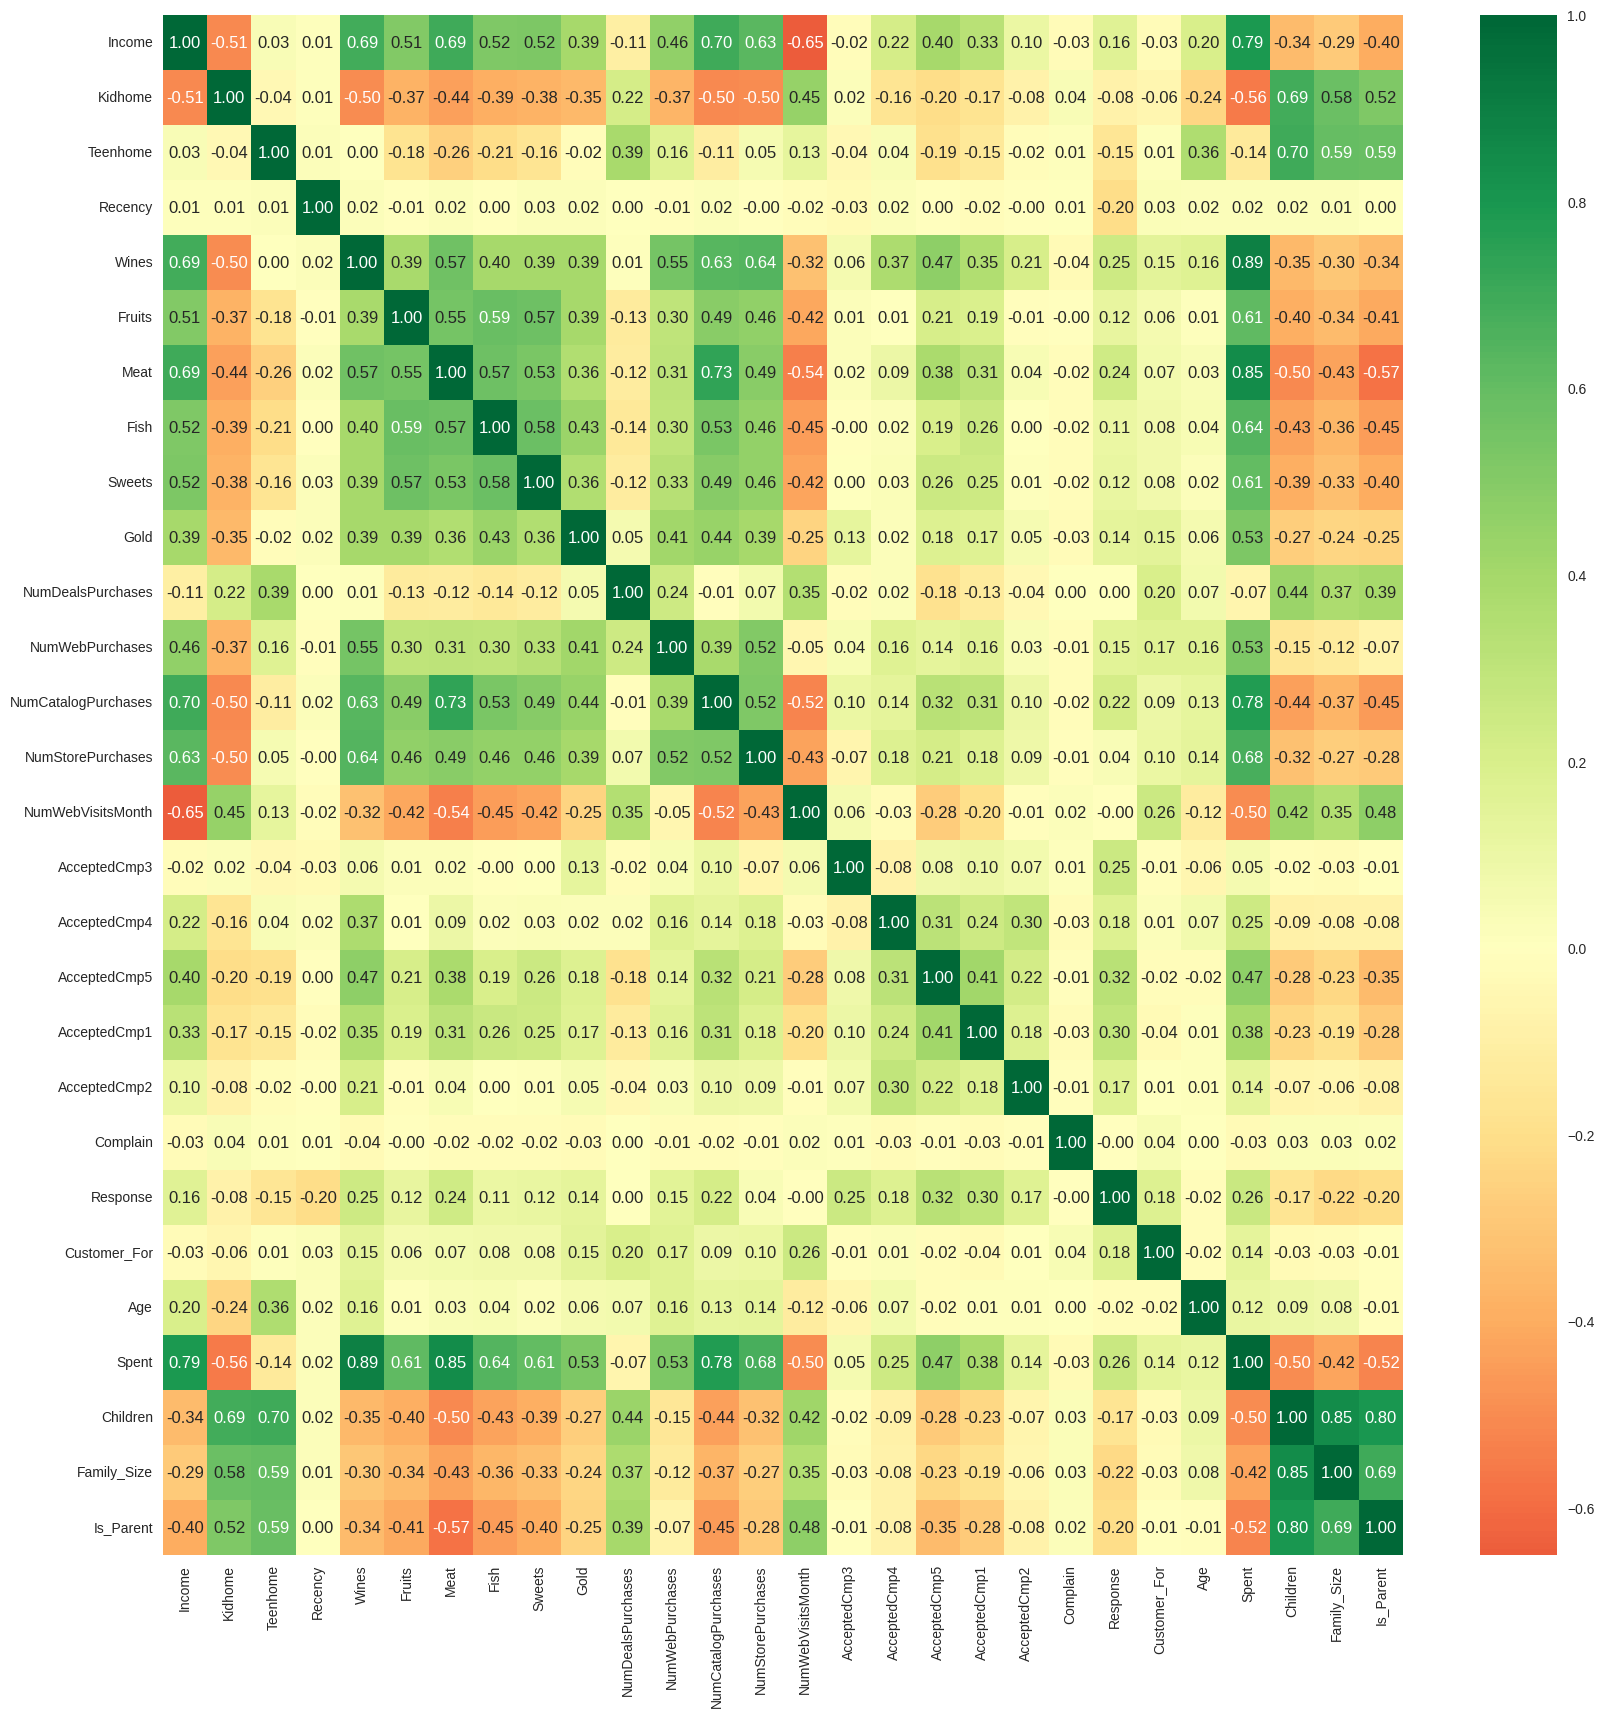

In [ ]:
# Matriz de correlación
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, fmt=".2f", cmap='RdYlGn', center=0)

## 2. Preprocesamiento de los Datos

In [ ]:
# Lista de variables categóricas
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Education', 'Living_With']


In [ ]:
# Codificando las variables de tipo objeto
LE=LabelEncoder()

for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
print(data['Education'])

0       0
1       0
2       0
3       0
4       1
       ..
2235    0
2236    1
2237    0
2238    1
2239    1
Name: Education, Length: 2212, dtype: int64


In [ ]:
data['Living_With']

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Living_With, Length: 2212, dtype: int64

In [ ]:
# Creamos una copia de los datos
ds = data.copy()
# Creamos un subconjunto del dataframe eliminado las variables relacionadas a las ofertas, promociones y quejas
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)


## 3. Reducción de Dimensionalidad

En este problema, se considerarán múltiples factores para realizar la clasificación final. Estos factores son esencialmente atributos o características. A mayor número de características, mayor dificultad para trabajar con el conjunto de datos. Muchas de estas características están correlacionadas, por lo que resultan redundantes. Por este motivo, se realizará una reducción de dimensionalidad sobre las características seleccionadas antes de introducirlas en un clasificador. La reducción de dimensionalidad es el proceso de disminuir el número de variables aleatorias consideradas, obteniendo un conjunto de variables principales.

El análisis de componentes principales (PCA) es una técnica para reducir la dimensionalidad de estos conjuntos de datos, aumentando la interpretabilidad y minimizando simultáneamente la pérdida de información.

¿Qué haremos?
1. Reducción de dimensionalidad con PCA
2. Graficar el dataframe reducido

In [ ]:
ds.shape

(2212, 23)

In [ ]:
# Como paso previo, es necesario escalar
scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns)
# print(scaled_ds)
print("Todos los atributos están escalados")

Todos los atributos están escalados


In [ ]:
# Vamos a utilizar los datos escalados para proceder con la reducción de dimensionalidad
print("Base de datos a ser usada para el proceso de modelado:")
scaled_ds.head()

Base de datos a ser usada para el proceso de modelado:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
# Iniciando el PCA para reducir las dimensiones. Inicialmente trabajaremos con 20
pca = PCA(n_components=20)
pca.fit(scaled_ds)

PCA(n_components=20)

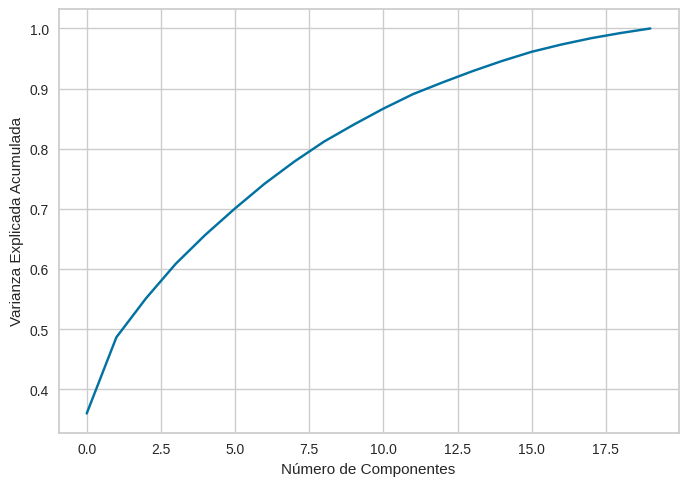

In [ ]:
# Graficar la varianza explicada acumulativa
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

In [ ]:
# Iniciando el PCA con 9 componentes
pca = PCA(n_components=9)
pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["pc1","pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9"]))
PCA_ds.describe()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,6.424437e-17,-3.854662e-17,5.380466e-17,-3.131913e-17,-3.613746e-17,-1.766720e-17,1.043971e-17,2.087942e-17,6.424437e-18
std,2.878377e+00,1.706839e+00,1.221957e+00,1.147715e+00,1.053866e+00,1.004180e+00,9.736191e-01,9.189725e-01,8.737763e-01
min,-5.969394e+00,-4.312182e+00,-3.530522e+00,-3.123846e+00,-3.066237e+00,-2.286687e+00,-3.367227e+00,-4.370902e+00,-5.151212e+00
25%,-2.538494e+00,-1.328322e+00,-8.288180e-01,-7.635880e-01,-7.414604e-01,-8.259031e-01,-6.971831e-01,-5.316787e-01,-5.528374e-01
50%,-7.804210e-01,-1.581289e-01,-2.194111e-02,-8.839731e-03,5.216976e-03,1.259184e-02,-3.912788e-02,5.163710e-02,2.845851e-03
75%,2.383290e+00,1.242288e+00,7.994002e-01,8.997670e-01,6.873477e-01,8.127623e-01,6.445675e-01,5.517116e-01,5.433281e-01
max,7.444305e+00,6.142725e+00,6.615202e+00,3.388963e+00,3.105235e+00,2.468995e+00,3.520662e+00,4.482107e+00,6.655977e+00


In [ ]:
PCA_ds.corr()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
pc1,1.000000e+00,-1.894005e-14,-6.089845e-12,-6.169017e-12,-2.296494e-12,2.786076e-12,-4.556783e-11,3.301567e-13,-4.726939e-12
pc2,-1.894005e-14,1.000000e+00,1.363217e-11,1.381840e-11,5.143909e-12,-6.240711e-12,1.020718e-10,-7.392623e-13,1.058836e-11
pc3,-6.089845e-12,1.363217e-11,1.000000e+00,2.199262e-08,8.186560e-09,-9.932357e-09,1.624523e-07,-1.176617e-09,1.685172e-08
pc4,-6.169017e-12,1.381840e-11,2.199262e-08,1.000000e+00,8.292895e-09,-1.006137e-08,1.645624e-07,-1.191900e-09,1.707061e-08
pc5,-2.296494e-12,5.143909e-12,8.186560e-09,8.292895e-09,1.000000e+00,-3.745257e-09,6.125690e-08,-4.436743e-10,6.354385e-09
pc6,2.786076e-12,-6.240711e-12,-9.932357e-09,-1.006137e-08,-3.745257e-09,1.000000e+00,-7.432004e-08,5.382879e-10,-7.709468e-09
pc7,-4.556783e-11,1.020718e-10,1.624523e-07,1.645624e-07,6.125690e-08,-7.432004e-08,1.000000e+00,-8.804181e-09,1.260950e-07
pc8,3.301567e-13,-7.392623e-13,-1.176617e-09,-1.191900e-09,-4.436743e-10,5.382879e-10,-8.804181e-09,1.000000e+00,-9.132874e-10
pc9,-4.726939e-12,1.058836e-11,1.685172e-08,1.707061e-08,6.354385e-09,-7.709468e-09,1.260950e-07,-9.132874e-10,1.000000e+00


Índices de adecuación: Los índices de adecuación son una medida de la cantidad de información que se conserva al reducir la dimensionalidad de los datos.

- Razón de la varianza explicada: Esta es la proporción de la varianza original de los datos que se explica por los componentes principales.

In [ ]:
# Calcular la razón de la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir la razón de la varianza explicada
print(explained_variance_ratio)
print(explained_variance_ratio.sum())

[0.36005684 0.12660793 0.06489147 0.05724584 0.04826656 0.04382269
 0.04119585 0.03670125 0.03317999]
0.8119684168384931


Índice de Kaiser-Meyer-Olkin (KMO): Este índice mide la adecuación de los datos para el análisis de componentes principales. Un valor de KMO superior a 0.5 indica que los datos son adecuados para el análisis de componentes principales.

In [ ]:
# Hay componentes que no siempre están incluidos en la distribución de Python,
# en este caso, podemos realizar una instalación de la siguiente forma.

!pip install factor_analyzer

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Calcular la métrica de KMO
kmo_stat = calculate_kmo(scaled_ds)

print("Métrica de Kaiser-Meyer-Olkin (KMO):", kmo_stat)

Métrica de Kaiser-Meyer-Olkin (KMO): (array([0.70740426, 0.8824507 , 0.81313832, 0.58604561, 0.37533885,
       0.81566969, 0.95584235, 0.89410181, 0.95485827, 0.95915664,
       0.94741323, 0.697583  , 0.8528141 , 0.90993827, 0.90702648,
       0.84804443, 0.64368865, 0.54029493, 0.84741683, 0.42183628,
       0.6942945 , 0.72703243, 0.77132875]), 0.828080543176882)


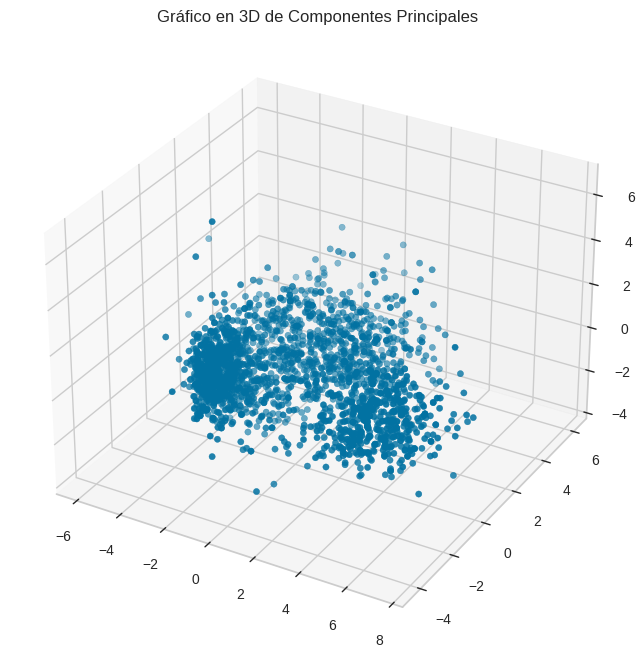

In [ ]:
# Proyección en 3D de los datos en una dimensión reducida
# esto lo hacemos puramente para fines visuales, no afectará de forma alguna las
# conclusiones de nuestros resultados.

x = PCA_ds["pc1"]
y = PCA_ds["pc2"]
z = PCA_ds["pc3"]

# Gráfico

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z) # , c='red', marker="o" )
ax.set_title("Gráfico en 3D de Componentes Principales")
plt.show()

## 4. Clustering

Luego de la reducción de dimensionalidad, vamos a utilizar un proceso de cluster jerárquico.

¿Qué pasos vamos a seguir?
1. Método del codo para determinar el número de clusters a seguir.
2. Proceso de clusterización
3. Examinar los clusters

Método del codo para determinar el número óptimo de clusters:


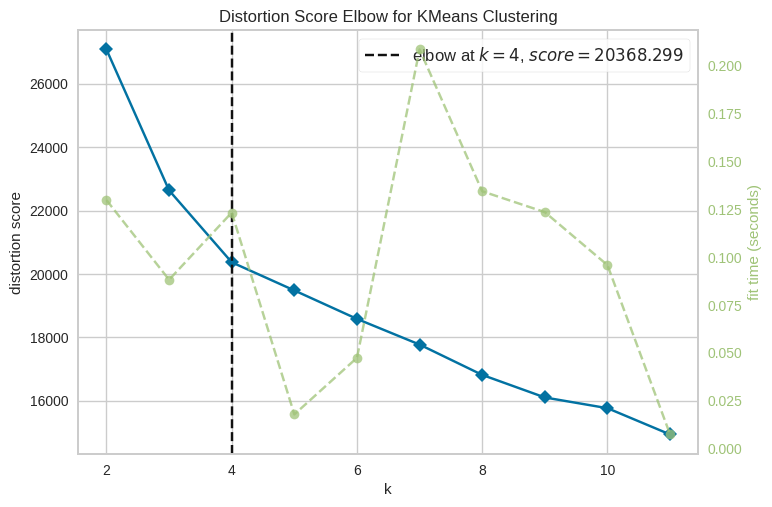

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Método del codo para encontrar el número óptimo de clusters
print('Método del codo para determinar el número óptimo de clusters:')
Elbow_M = KElbowVisualizer(KMeans(n_init='auto', random_state=0), k=11)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Cluster K Medias

In [ ]:
# Iniciar el modelo K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')  # Fijar random_state para la reproducibilidad

# Ajustar el modelo y predecir los clusters
yhat_kmeans = kmeans.fit_predict(PCA_ds)

# Agregar la característica Clusters al dataframe PCA_ds
PCA_ds["Clusters_KM"] = yhat_kmeans

# Agregar la característica Clusters al dataframe original
data["Clusters_KM"] = yhat_kmeans

In [ ]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_KM
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.009042,0.150542,512.144213,54.086347,607.268083,0.645570,0.947559,2.593128,0.714286,1.483273
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.094678,0.357683,232.551465,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856,1.077373
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,340.000000,46.000000,69.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,513.000000,53.000000,397.000000,1.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,686.000000,64.000000,1048.000000,1.000000,1.000000,3.000000,1.000000,2.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1063.000000,83.000000,2525.000000,1.000000,3.000000,5.000000,1.000000,3.000000


### Cluster Aglomerativo (Jerárquico)

In [ ]:
# Iniciamos el proceso de cluster aglomerativo
AC = AgglomerativeClustering(n_clusters=4)

# Estimamos el modelo y predecimos los clusters
yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds["Clusters_AC"] = yhat_AC

# Añadimos los clusters al dataframe original
data["Clusters_AC"]= yhat_AC

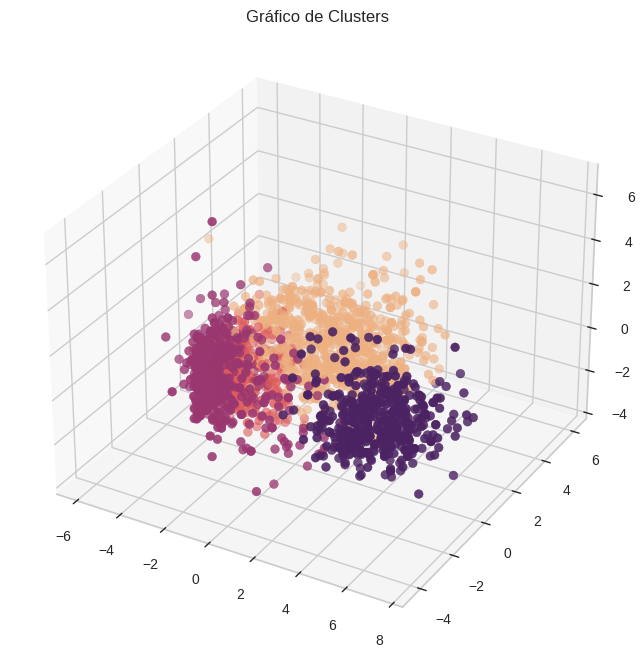

In [ ]:
# Graficamos los clusters para los 3 primeros componentes principales
# Dado que el número óptimo de PCs es mayor a 3, este tipo de visualización
# es opcional

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_AC"], marker='o', cmap = 'flare' )
ax.set_title("Gráfico de Clusters")
plt.show()

### Cluster Jerárquico

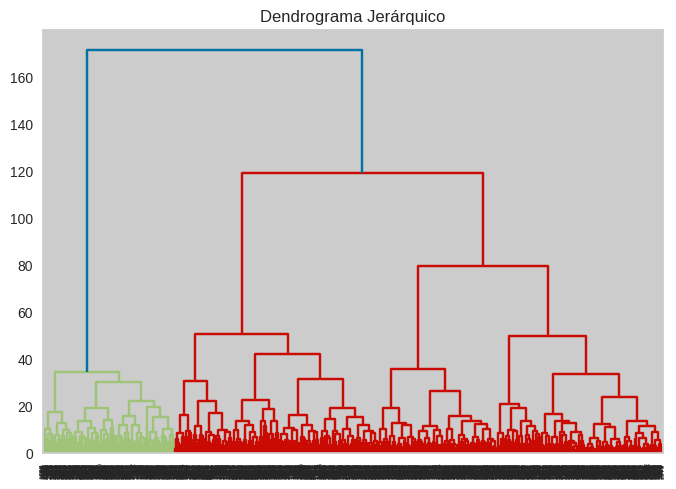

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# Calcular la matriz de enlace utilizando el método de enlace completo (complete linkage)
Z = linkage(PCA_ds, method='ward')

# Crear un dendrograma para visualizar la jerarquía
dendrogram(Z) #, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrograma Jerárquico")
plt.show()

In [ ]:
# Elegir un umbral para determinar el número de clusters
threshold = 60  # Se puede ajustar este valor según la visualización del dendrograma

# Asignamos clusters utilizando el umbral
clusters_hierarchical = fcluster(Z, t=threshold, criterion='distance')

# Agregamos la característica Clusters al dataframe PCA_ds
PCA_ds["Clusters_Hierarchical"] = clusters_hierarchical

# Agregamos la característica Clusters al dataframe original
data["Clusters_Hierarchical"] = clusters_hierarchical

In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters_KM,Clusters_AC,Clusters_Hierarchical
0,0,58138.0,0,0,58,635,88,546,172,88,...,971.0,66,1617,0,0,1,0,0,3,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,125.0,69,27,0,2,3,1,3,1,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,472.0,58,776,1,0,2,0,0,3,1
3,0,26646.0,1,0,26,11,4,20,10,3,...,65.0,39,53,1,1,3,1,1,2,4
4,1,58293.0,1,0,94,173,43,118,46,27,...,321.0,42,422,1,1,3,1,1,0,2


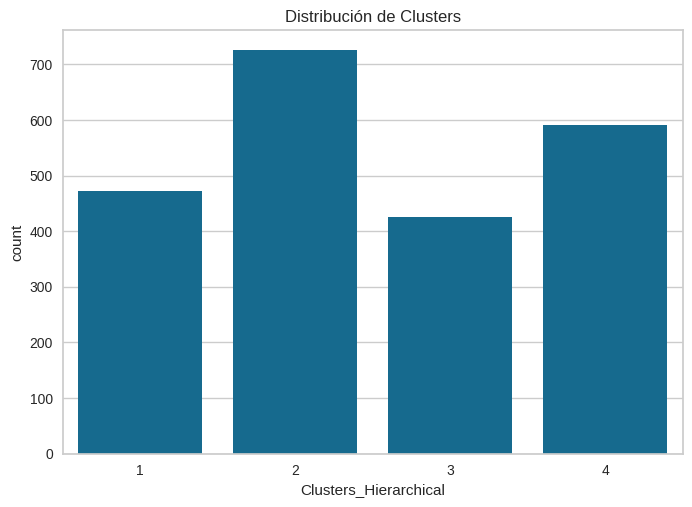

In [ ]:
# Conteo de los clusters:

pl = sns.countplot(x=data["Clusters_Hierarchical"])
pl.set_title("Distribución de Clusters")
plt.show()

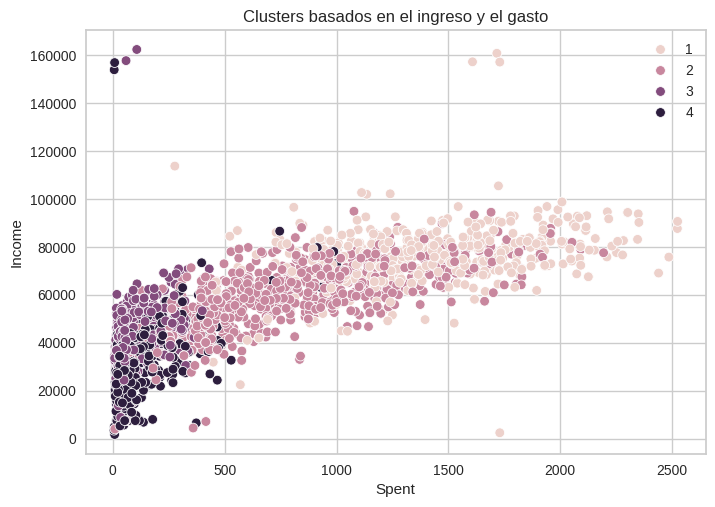

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_Hierarchical"])
pl.set_title("Clusters basados en el ingreso y el gasto")
plt.legend()
plt.show()

## 5. Evaluación

### K - Means

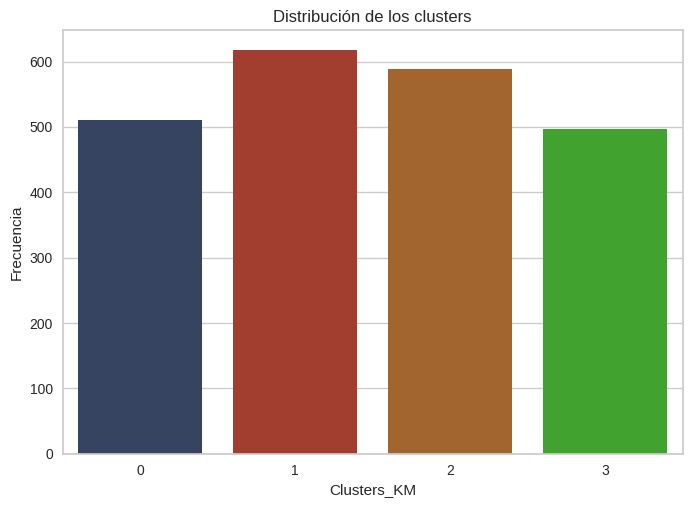

In [ ]:
# Analizaremos la distribución de los clusters:
pal = ["#2f4068","#b52f1d", "#b5641d","#34b51d"]
pl = sns.countplot(x=data["Clusters_KM"], palette= pal)
pl.set_title("Distribución de los clusters")
plt.ylabel("Frecuencia")
plt.show()

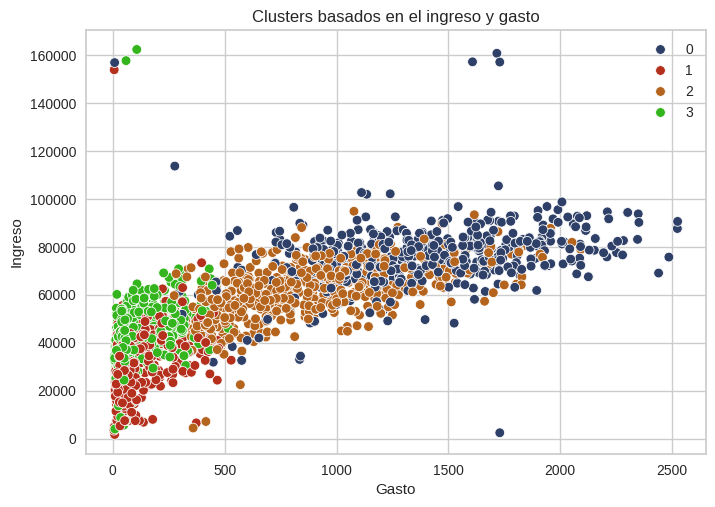

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_KM"], palette= pal)
pl.set_title("Clusters basados en el ingreso y gasto")
plt.xlabel("Gasto")
plt.ylabel("Ingreso")
plt.legend()
plt.show()

Podemos identificar 4 grupos:

* Grupo 0: gasto alto e ingreso promedio
* Grupo 1: gasto alto e ingreso alto
* Grupo 2: gasto bajo e ingreso bajo
* Grupo 3: gasto alto e ingreso bajo

Luego, analizaremos la distribución detallada de los clusters por el nivel de ingreso y los distintos tipos de productos en los datos: vino, frutas, carne, pescado, dulces y oro.

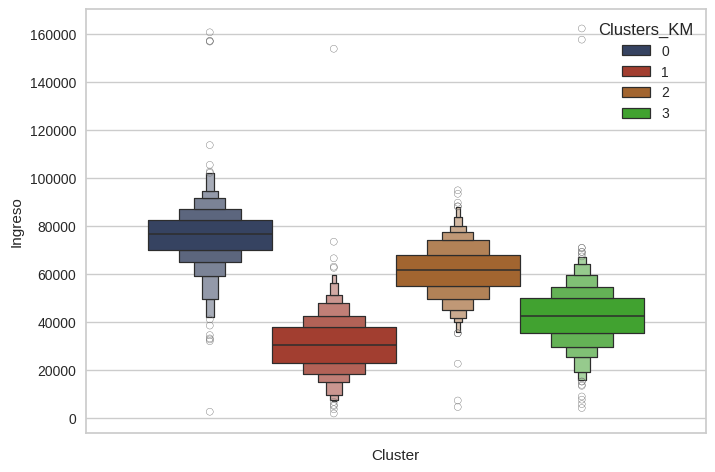

In [ ]:
pl=sns.boxenplot(hue=data["Clusters_KM"], y=data["Income"], palette=pal)
plt.ylabel("Ingreso")
plt.xlabel("Cluster")
plt.show()

In [ ]:
pl=sns.boxenplot(hue=data["Clusters_KM"], y=data["Spent"], palette=pal)
plt.ylabel("Gasto total")
plt.xlabel("Cluster")
plt.show()

¿Cómo les fue a nuestras campañas en el pasado?

In [ ]:
# Creamos un nuevo feature para tener la suma de las promociones aceptadas
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# Graficamos el conteo de las campañas aceptadas
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters_KM"], palette= pal)
pl.set_title("Conteo de Promociones Aceptadas")
pl.set_xlabel("Número de Promociones Aceptadas")
plt.show()

Puede verse que la respuesta a las campañas no ha sido importante. Casi ningún cliente ha participado en todas las campañas. Probablemente, sea mejor tener un esquema de campañas mejor focalizadas y planeadas.

In [ ]:
# Graficamos el número de ofertas adquiridas

plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],hue=data["Clusters_KM"], palette= pal)
pl.set_title("Número de ofertas adquiridas")
plt.show()

## 6. Perfilamiento

Una vez que se han formado los grupos y se han analizado sus hábitos de compra, pasemos a ver quiénes pertenecen a cada uno de ellos. Para ello, se perfilarán los grupos formados y se llegará a una conclusión sobre quién es nuestro cliente estrella y quién necesita más atención del equipo de marketing de la tienda minorista.

Para determinarlo, se trazarán algunas de las características que indican los rasgos personales del cliente en función del grupo al que pertenece. A partir de los resultados, se llegarán a las conclusiones.

In [ ]:
Personal0 = ["Spent" ,"Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

In [ ]:
tabla_pivot = data.pivot_table(index="Clusters_KM", values=Personal0, aggfunc="mean")
print(tabla_pivot.round(3))

In [ ]:
Personal = ["Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

In [ ]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters_KM"], kind="kde", palette=pal)
    plt.show()

¿Cómo caracterizamos a los clusters?

**Cluster 0**
- Son definitivamente padres/madres
- Tienen entre 2 a 4 miembros en el hogar
- Los padres solteros son un subconjunto de este grupo
- La mayoría tiene un adolescente en el hogar
- Son relativamente mayores

**Cluster 1**
- Definitivamente no tienen hijos
- A lo mucho hay 2 miembros en la familia
- El número de parejas es ligeramente mayor al de personas que viven solas
- No hay un rango de edad en específico
- Es un grupo de ingresos altos

**Cluster 2**
- La mayoría de este grupo tiene hijos
- A lo mucho existen 3 miembros en el hogar
- La mayoría tiene 1 hijo (típicamente no adolescentes)
- Relativamente jóvenes

**Cluster 3**
- Definitivamente son padres/madres
- Entre 2 a 5 integrantes en el hogar
- La mayoría tiene un adolescente en el hogar
- Relativamente mayores
- Tienen bajos ingresos